                            T.A. Maryam Azhin

### Non-ideal reactors. Predicting conversion in flow reactors

**Q 1**. Ideal laminar flow reactor (LFR). A constant-density reaction is to be performed in a tubular reactor. Volumetric flow rate of the feed at reactor entrance conditions is $2 L/s$, the reactor volume is $12 L$. RTD measurements showed that the reactor behaves as an ideal LFR. What are the RTD $E(t)$ and cumulative distribution $F(t)$ functions for this reactor?

**Answer 1**. In a constant-density LFR,  $\bar{t}=\tau$ (residence time = space time)

In [65]:
import numpy as np
V=12 #L
Q0=2 #L/s

Tau=V/Q0
print ("{0:.1f}".format(Tau),'(s)')

6.0 (s)


In a Laminar Flow Reactor (LFR) :
         
$E(t)=0$,                    if $t<\tau/2$ s

$E(t)=\frac{\tau^2}{2t^3}$   if $t>=\tau/2$ s


Text(0.5, 0, 'Time, s')

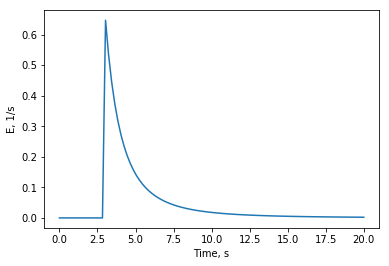

In [66]:
import math
t=np.linspace(0.,20,100)
E=np.zeros(len(t))

for i in range(0,len(t)):
    if  t[i]>3:
        E[i]=(pow(Tau,2)/2)/pow(t[i],3)
    else:
        E[i]=0   

import matplotlib.pyplot as plt
plt.plot(t,E)
plt.ylabel('E, 1/s')
plt.xlabel('Time, s')

In a LFR :
         
$$F(t)=0, \;if\; t<\tau/2$$

$$F(t)=1-\frac{\tau^2}{4t^2}\; if\; t>=\tau/2s$$ 


Text(0.5, 0, 'Time, s')

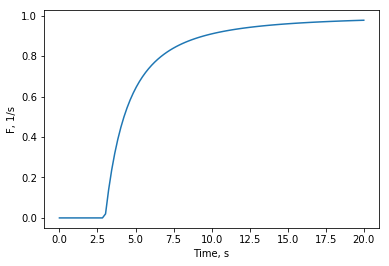

In [67]:
F=np.zeros(len(t))


for i in range(0,len(t)):
    if  t[i]>3:
        F[i]=1-pow(Tau,2)/(4*pow(t[i],2))
    else:
        F[i]=0 

                

import matplotlib.pyplot as plt
plt.plot(t,F)
plt.ylabel('F, 1/s')
plt.xlabel('Time, s')

**Q 2**. First-order reaction in a CSTR with dead zones. A constant-density first-order reaction with rate constant of $2.5 s^{-1}$ is to be performed in a CSTR of $10 L$ volume at $5 L/s$ flow rate. RTD measurements showed that dead zones exist in this reactor. Real mean residence time of the feed in the active zone is $1.7 s$. A significant investment is required to fix the problem with the reactor. You need to evaluate if this investment is worth the gain in conversion. Calculate the conversion if the reactor operated as an ideal reactor (i.e., if the problem were cured), and the conversion in the reactor with dead zones.
Note: since this is a first-order reaction, so the micromixing effect is not applicable and we can predict the conversion right from the RTD measurements. Any other reaction order requires use of a micromixing model.

In an ideal CSTR:
mole balance=$V=\frac{F_{A0}}{-r_A}X_A$ 
for a constant density case: 

 $-r_A=kC_A=kC_{A0}(1-X)=k\frac{F_{A0}}{Q_0}(1-X)$
 
 $V=\frac{X.Q_0}{k(1-X)}$
 
 $\tau=\frac{V}{Q_0}=\frac{X}{k(1-X)}$

In [68]:
import numpy as np
from scipy.optimize import fsolve
V=10 #L
Q0=5 #L/s
Tau=V/Q0
k = 2.5 #s^{-1}

def f(x):
    return (Tau-x/(k*(1-x)))

x = fsolve(f, 0.01)
f(x)

print (x)
print ("{0:.1f}".format(Tau),'(s)')

[0.83333333]
2.0 (s)


Non-ideal CSTR with dead zones:
1st order reaction with constant density

$\frac{C_A}{C_{A0}}=\int_0^\infty e^{(-kt)} dt$

$\frac{C_A}{C_{A0}}=\frac{C_{A0}(1-x)}{C_{A0}}$

$E(t)=\frac{e^{(-t/\tau)}}{\tau}$

$x=1-\int_0^\infty \frac{e^{-t/\tau}}{\tau}.e^{-kt}dt$

$x=1-\frac{1}{\tau}\int_0^\infty e^{-(1/\tau+k)t}dt$

In [69]:
Taur=1.7
xr=1-1/Taur*(1/(1/Taur+k))
print ("{0:.1f}".format(xr))

0.8


Since $X_{real}<x_{ideal}$, technoeconomical analysis is needed to check if the reactor requires further improvement 

**Q 3**. Predicting conversion using a segregation model. The following RTD function was obtained from a pulse tracer test to a real flow reactor:

|t(s)|0|5|10|15|20|25|30|35|
|--|--|--|--|--|--|--|--|--|
|E(t)|0|0|0|0.05|0.1|0.05|0|0|


This flow reactor is to be used to perform a second-order reaction $2A->C$ in the liquid phase. The entering concentration is $2 M$ and the rate constant with respect to $A$ is $0.06 dm^3/(mol.s)$. Predict the conversion using a segregation model.

**Answer 3**. $\bar{x}=\int_0^\infty x(t)E(t)dt$

For a 2nd order CVBR:

MB: $N_{A0}\frac{dx}{dt}=-r_AV$

$\frac{dx}{dt}=\frac{-r_A}{C_{A0}}=\frac{kC_A^2}{C_{A0}}=\frac{kC_{A0}^2(1-x)^2}{C_{A0}}$

$-r_A=kC_A^2$

$\int_0^x \frac{dx}{(1-x)^2}=kC_{A0}\int_0^t dt$

$x=\frac{kC_{A0}t}{kC_{A0}t+1}$

|t(s)|0|10|15|20|25|30|
|--|--|--|--|--|--|--|
|E(t)|0|0|0.05|0.1|0.05|0|
|x(t)|0|0.55|0.643|.706|0.75|0.78|
|xE(t)|0|0|0.032|0.071|0.038|0|

x3= [0.         0.54545455 0.64285714 0.70588235 0.75       0.7826087 ]
xE3= [0.         0.         0.03214286 0.07058824 0.0375     0.        ]
Xbar= 0.701155462184874


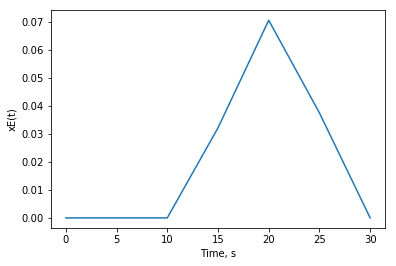

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

t3 = np.array([0,10,15,20,25,30])
E3 = np.array([0,0,0.05,.1,.05,0])
k = 0.06
CA0 = 2

x3=np.divide(np.dot(k*CA0,t3),np.add(np.dot(k*CA0,t3),1))
xE3=np.multiply(x3,E3)

#plt.plot(t3,x3)
#plt.ylabel('x')
#plt.xlabel('Time, s')

print('x3=',x3)
print('xE3=',xE3)

plt.plot(t3,xE3)
plt.ylabel('xE(t)')
plt.xlabel('Time, s')

xbar = integrate.cumtrapz(xE3, t3, initial=0) 
print('Xbar=', xbar[-1])


Predicted conversion in the real reactor is $70\%$
Altough we have a flow reactor, for the calculation of $x(t)$ the equation for constant volume batch reactor (CVBR) has been used. The reason is that in the segregation model it is assumed that flow passes through the reactor as separated globules behaving as CVBR.